Titanic EDA

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Dataset source: https://www.kaggle.com/c/titanic/data

For this analysis I'll only be making use of the training set.

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Research Question: what sorts of people were more likely to survive?

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.dpi'] = 70
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
corrmat = titanic.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


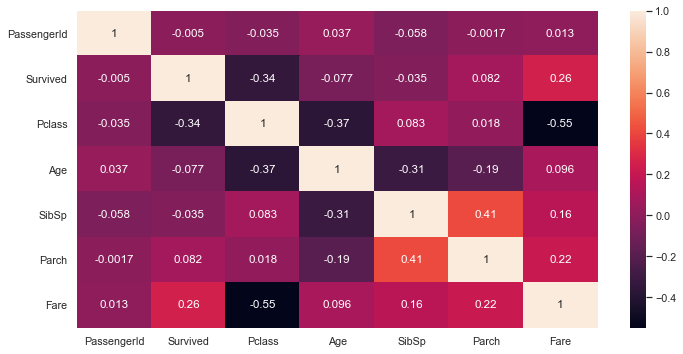

In [81]:
sns.heatmap(corrmat, annot= True); #most attributes are categorical and show little relationship to eacho ther

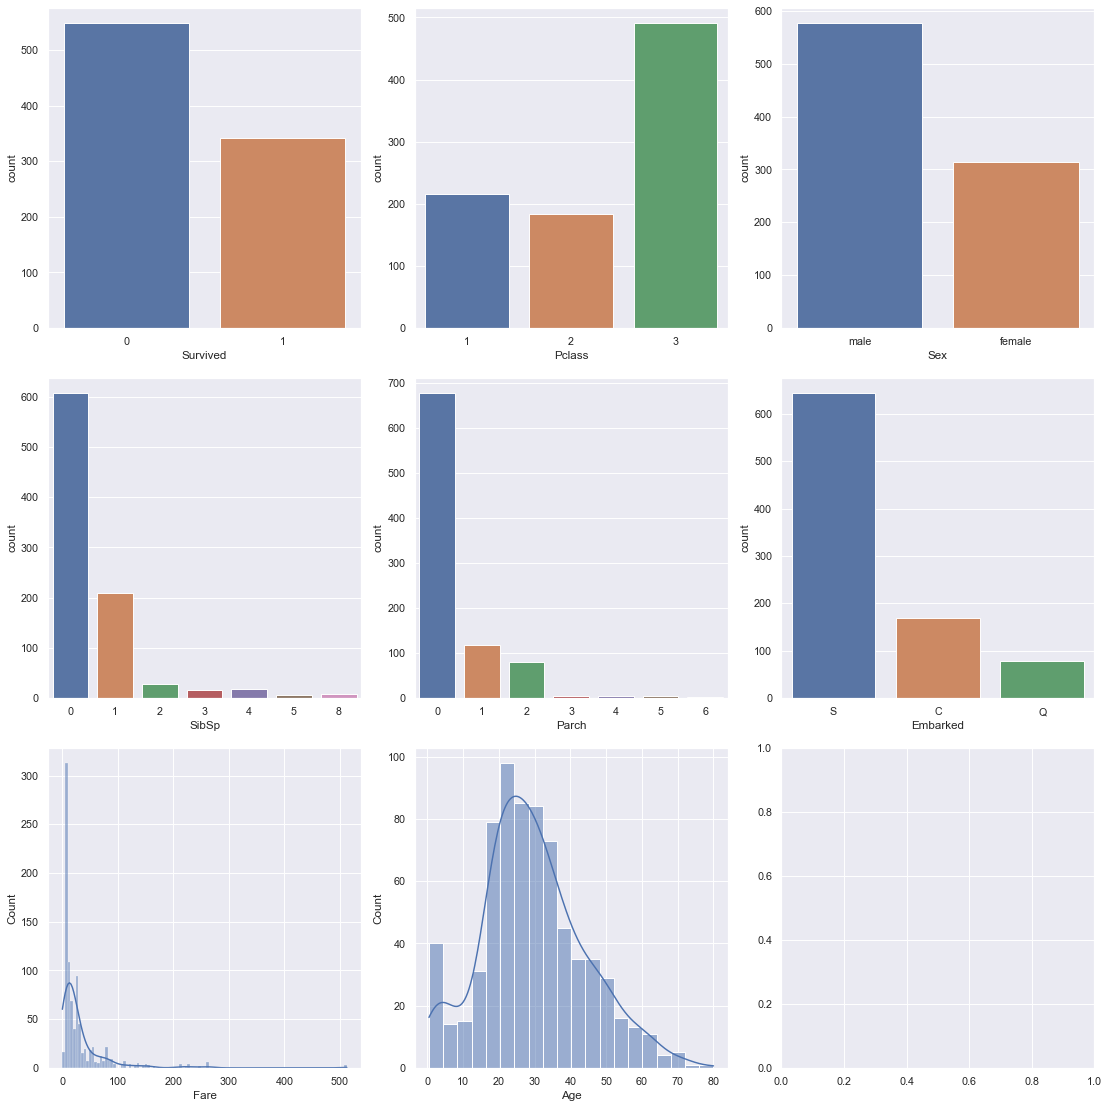

In [32]:
fig, ax = plt.subplots(3,3,figsize = (16,16))

sns.countplot(x = 'Survived', data=titanic, ax=ax[0][0])
sns.countplot(x = 'Pclass', data=titanic, ax=ax[0][1])
sns.countplot(x = 'Sex', data=titanic, ax=ax[0][2])
sns.countplot(x = 'SibSp', data=titanic, ax=ax[1][0])
sns.countplot(x = 'Parch', data=titanic, ax=ax[1][1])
sns.countplot(x = 'Embarked', data=titanic, ax=ax[1][2])

sns.histplot(data=titanic['Fare'], kde=True, ax=ax[2][0])
sns.histplot(data=titanic['Age'], kde=True, ax=ax[2][1])

plt.tight_layout()

Some initial observations:
1. Is the number of survivers really close to 2/3?
2. Most passengers traveled 3rd class
3. Sex also seems roughly a 2/3 ratio
4. Most people traveled without siblings (and some with 6)
5. Most people traveled without parents, indicating most adults than children on board
6. Most people embarked from Southampton
7. A low far around 10 was paid the most by far (how does this square with Pclass?)
8. Age rougly normal distribution with slight skew to left

Average passenger was a 28 year old male, having left alone from Southampton to travel on the Titanic in 3rd class cabin and did not surive the ordeal.

Univariate Analysis - Looking at all the attributes individually

1. Survivors

In [39]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
(342/(549+342))*100

38.38383838383838

Out of the titanic (training dataset) roughly 38% of passengers survived.

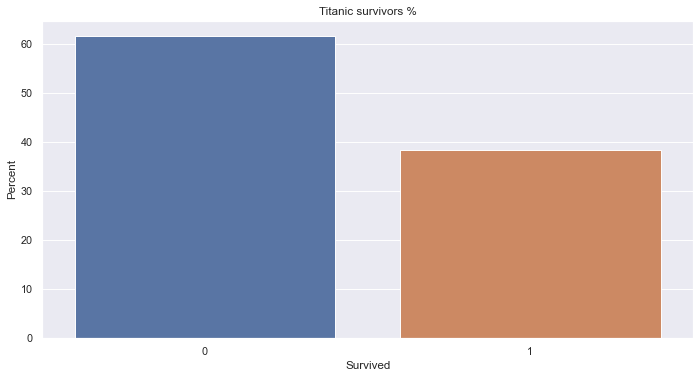

In [82]:
ax = sns.barplot(x='Survived', y='Survived', data=titanic, estimator=lambda x: len(x) / len(titanic) * 100)
ax.set(ylabel="Percent")
plt.title('Titanic survivors %');

Observations:
- Survival chances independent of other attributes was roughly 40%

2. Pclass - passenger class

In [52]:
titanic['Pclass'].value_counts() #passangers per class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [56]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count() #passengers by class by survival

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

It appears that the higher the passenger class, the higher the percentage of survival

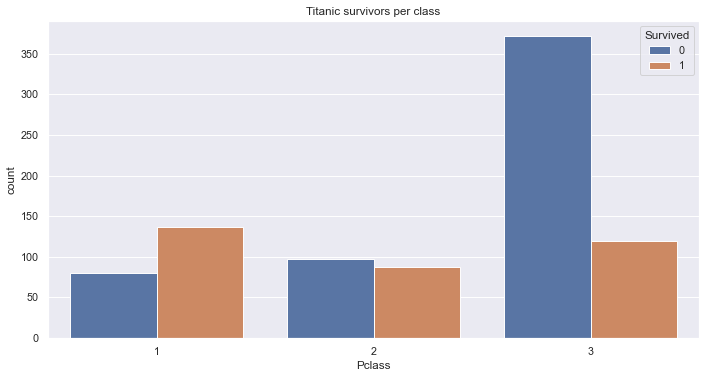

In [83]:
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title('Titanic survivors per class');

In fact, the rate of survival is much lower in 3rd class.

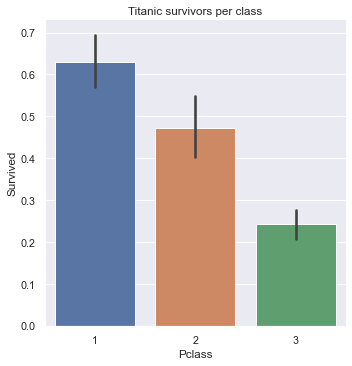

In [84]:
sns.catplot(data=titanic, x='Pclass', y='Survived', kind='bar')
plt.title('Titanic survivors per class');

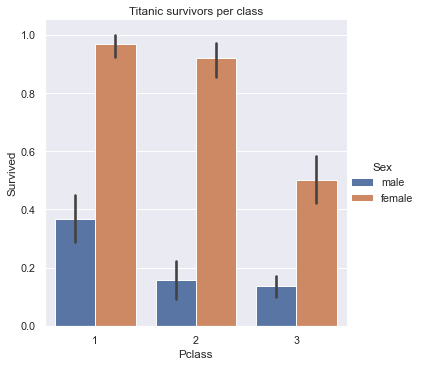

In [353]:
sns.catplot(data=titanic, x='Pclass', y='Survived', kind='bar', hue='Sex')
plt.title('Titanic survivors per class');

Observations:
- Passenger class had a big impact on survival rate
- Passengers traveling 1st class were about 3 times as likely to survive as those in the 3rd class.
- 2nd class passengers had a roughly 50% chance of survival on average, but was much lower for men

3. Sex

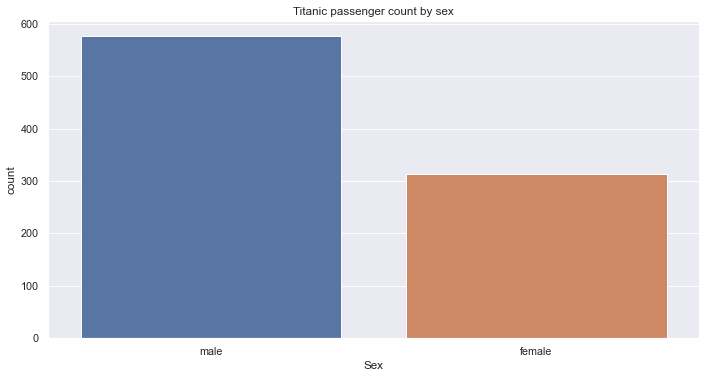

In [97]:
sns.countplot(data=titanic, x='Sex') #ratio M/F around 2:1
plt.title('Titanic passenger count by sex');

In [92]:
titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

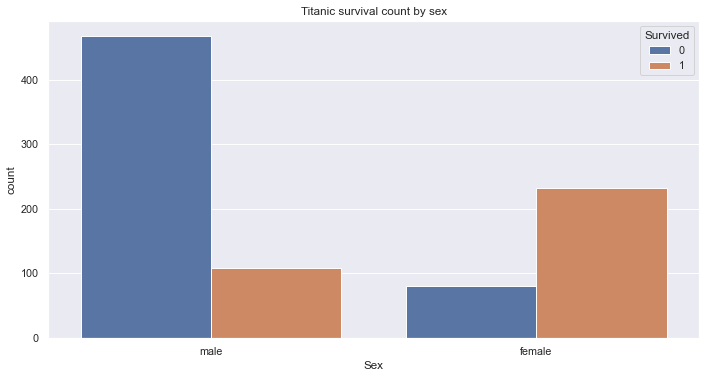

In [98]:
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title('Titanic survival count by sex');

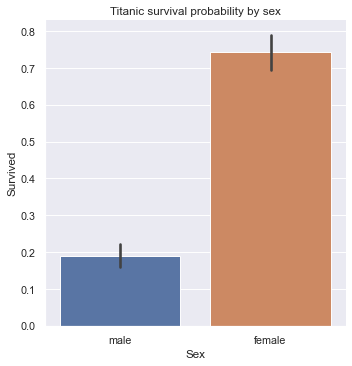

In [99]:
sns.catplot(data=titanic, x = 'Sex', y = 'Survived', kind = 'bar')
plt.title('Titanic survival probability by sex');

Women were much more likely to survive than men. Combining this with our previously observations about passenger class, let's explore this a bit further.

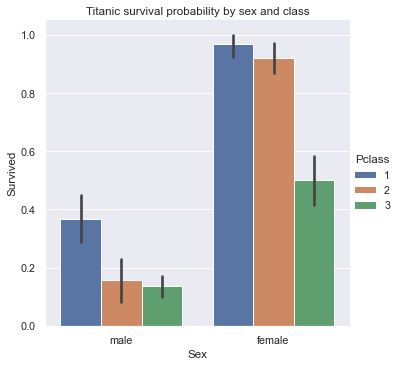

In [100]:
sns.catplot(data=titanic, x = 'Sex', y = 'Survived', kind = 'bar', hue='Pclass')
plt.title('Titanic survival probability by sex and class');

Or in a more visual way:

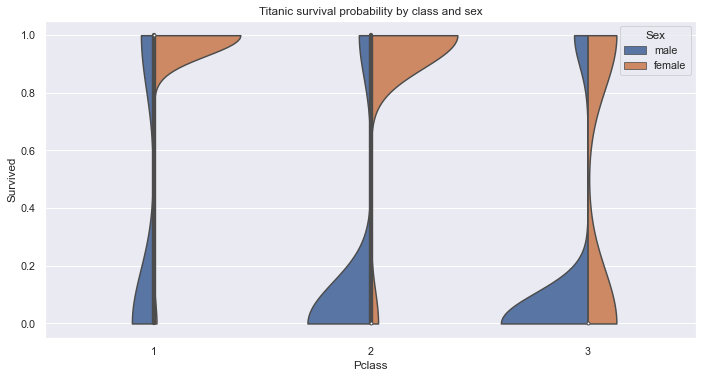

In [102]:
sns.violinplot(data=titanic, x='Pclass', y='Survived', hue='Sex', split=True, cut=0)
plt.title('Titanic survival probability by class and sex');

Observations:
- We see a heavy skew for surival rates by sex, especially in 2nd class. 
- In 1st and 2nd class women were very likely to survive. 
- Men in especially 2nd and 3rd class were very likely not to survive.

4. Age

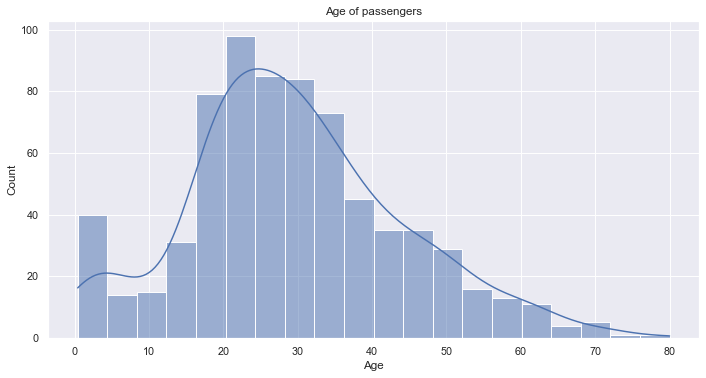

In [111]:
sns.histplot(data=titanic, x='Age', kde=True)
plt.title('Age of passengers');

In [157]:
titanic['Age'].median() #average age

28.0

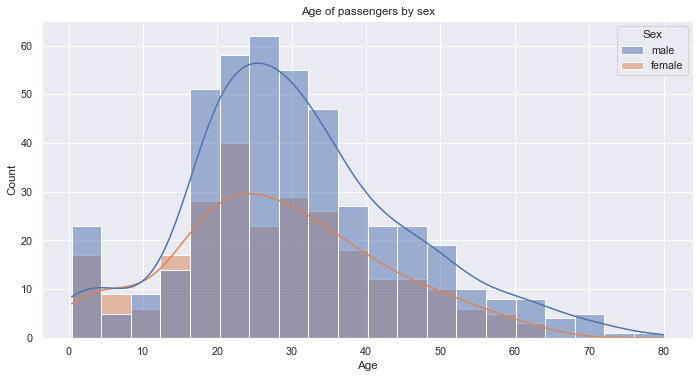

In [116]:
sns.histplot(data=titanic, x='Age', kde=True, hue='Sex')
plt.title('Age of passengers by sex');

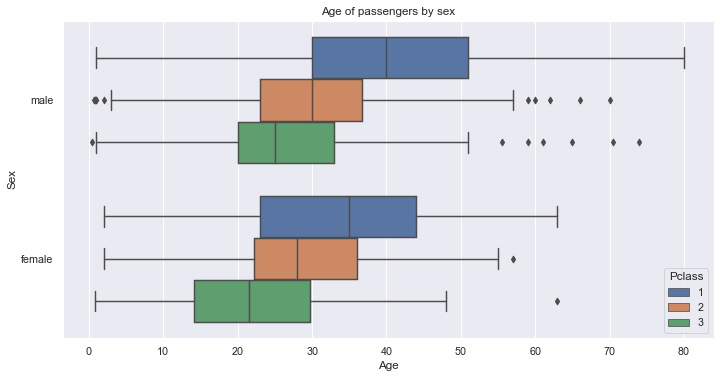

In [119]:
sns.boxplot(data=titanic, x='Age', y='Sex', hue='Pclass')
plt.title('Age of passengers by sex');

To emphasize this information more visually:

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

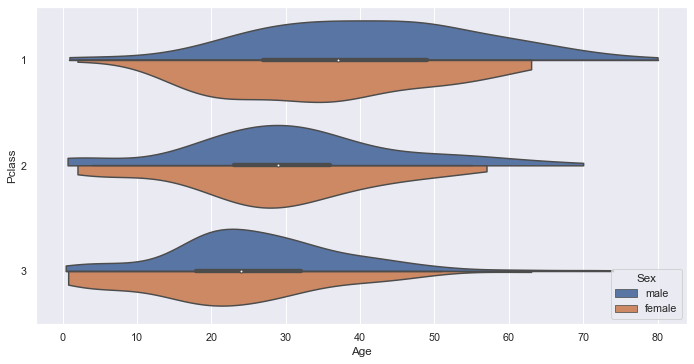

In [128]:
sns.violinplot(data=titanic, x= 'Age', y = 'Pclass', hue='Sex', split=True, orient='h', cut=0)

In [153]:
titanic.iloc[titanic['Age'].idxmax()][['Name', 'Survived']] #who was the oldest passenger on board and did they survive?

Name        Barkworth, Mr. Algernon Henry Wilson
Survived                                       1
Name: 630, dtype: object

Combining our observations so far let's see how they interact together.

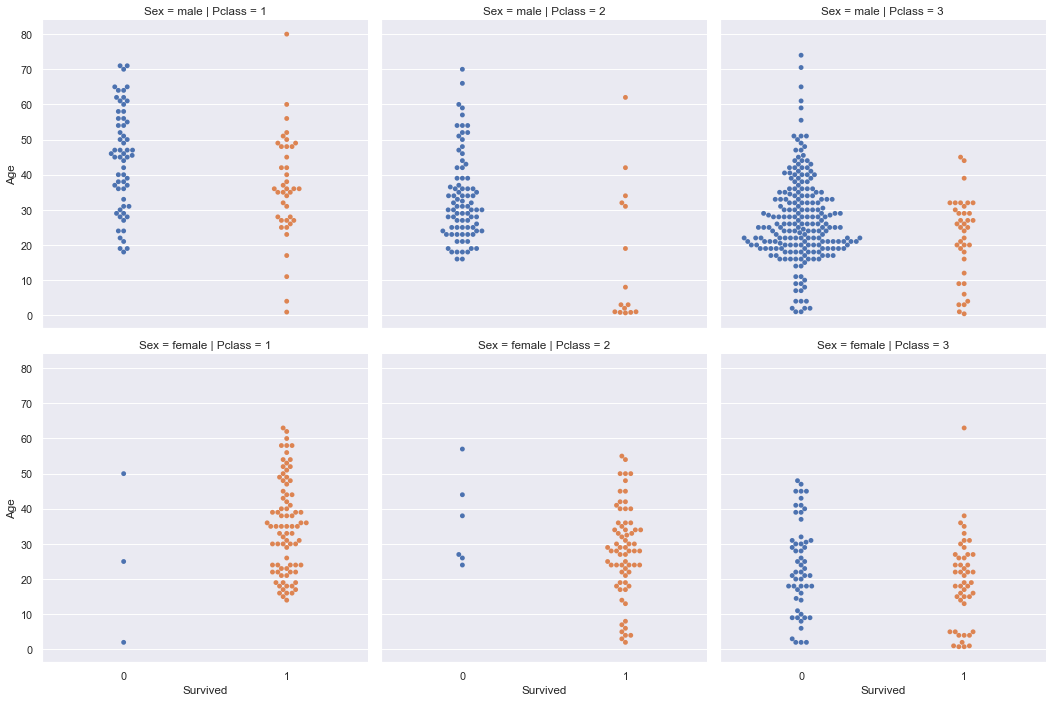

In [166]:
sns.catplot(data=titanic, x = 'Survived', y = 'Age', kind = 'swarm', row = 'Sex', col = 'Pclass')

Observations:
- Average age of both sexes around 20-30 (median: 28)
- Class and age are positively correlated - the higher the class, the higher the passenger age.
- Swarmplot clearly shows just how bad the survival rate was for male passengers in 3rd class (top-right), and relatively good they were for females in 1st class (bottom-left).

5. Fare

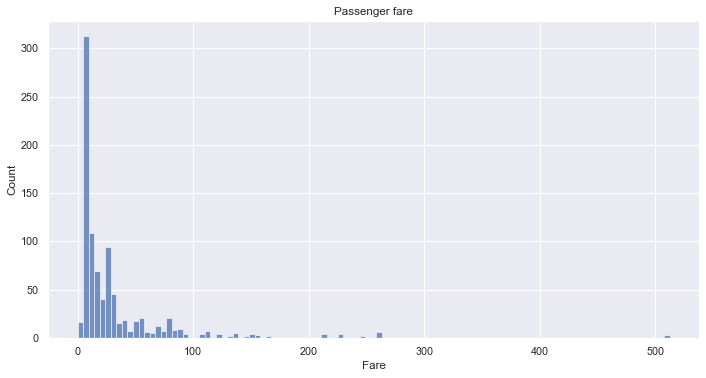

In [168]:
sns.histplot(data=titanic, x='Fare')
plt.title('Passenger fare');

In [169]:
titanic['Fare'].mean() #average fare price

32.2042079685746

As we saw in our analysis of the passenger class attribute, most passengers traveled in 3rd class (~55%) as accounts for the clustering of lower fare prices.

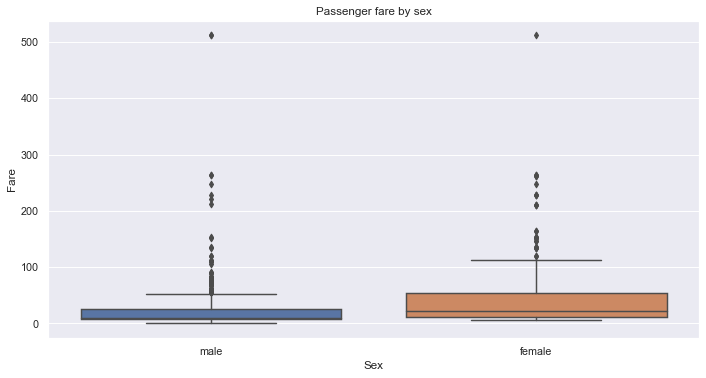

In [188]:
sns.boxplot(data=titanic, x='Sex', y='Fare')
plt.title('Passenger fare by sex');

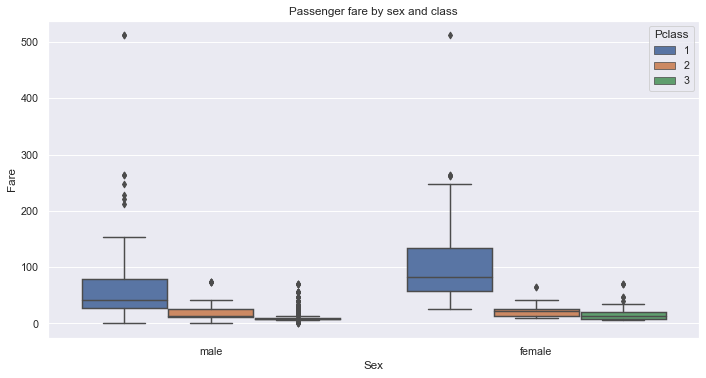

In [189]:
sns.boxplot(data=titanic, x='Sex', y='Fare', hue='Pclass')
plt.title('Passenger fare by sex and class');

We see a very short box for males, indicating that 75% of the tickets they bought were under $30.
For both sexes we see a lot of significant outliers, with two extreme data points for males and females, respectively.

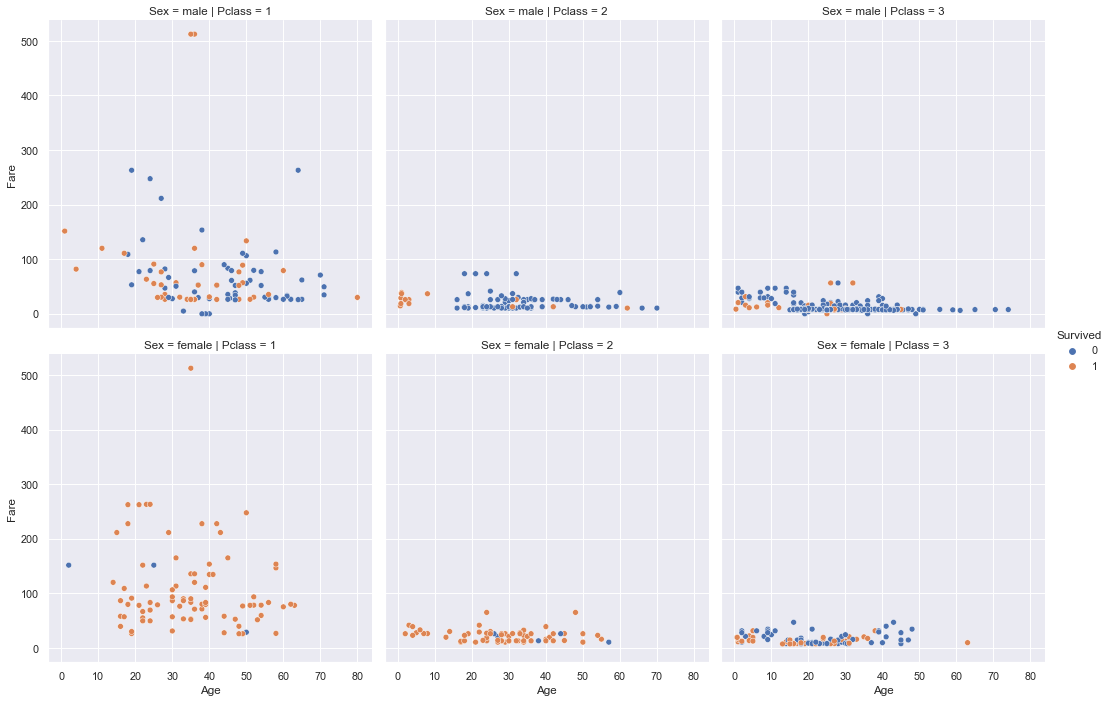

In [385]:
sns.relplot(data=titanic, x='Age', y='Fare', row='Sex', col='Pclass', hue='Survived');

Observations:
- 1st class tickets vary widely in fare
- Females paid more for 1st class tickets
- 75% of men bought 3rd class tickets (fare < $30)
- Average fare was ~$32

6. SibSp - number of siblings/spouses aboard the Titanic

In [218]:
titanic['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

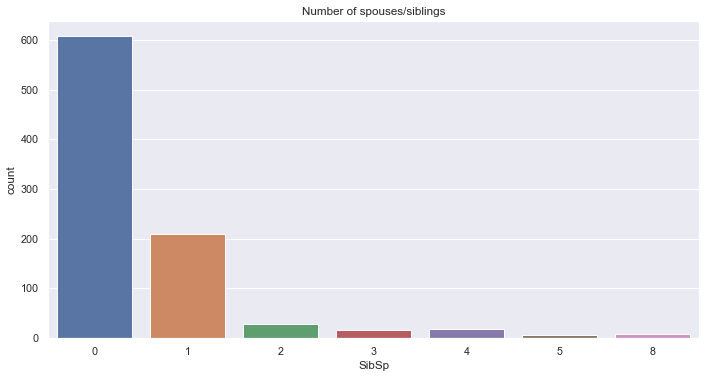

In [227]:
sns.countplot(data=titanic, x='SibSp')
plt.title('Number of spouses/siblings');

Most people traveled without family (68%), few traveled with a sibling or spouse (23%) and the rest traveled with more than one SibSp.

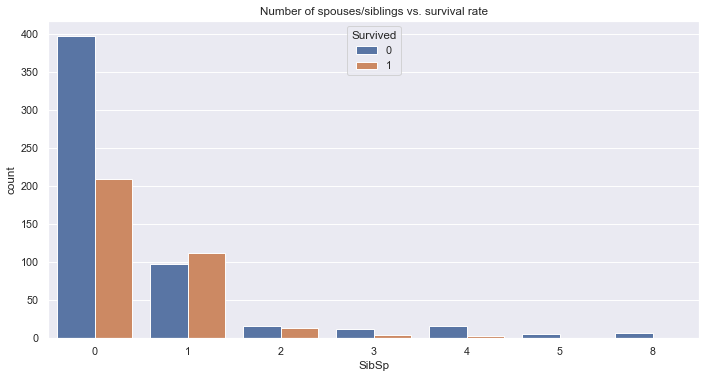

In [228]:
sns.countplot(data=titanic, x='SibSp', hue='Survived')
plt.title('Number of spouses/siblings vs. survival rate');

Traveling with 1 or 2 spouses/siblings increased the changes of survival (vs. traveling without), as seen more clearly here:

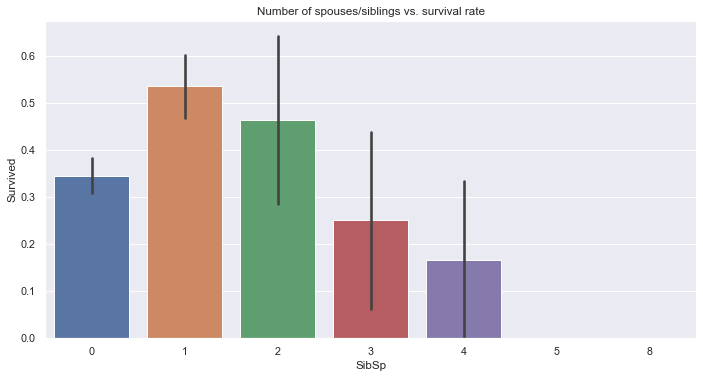

In [231]:
sns.barplot(data=titanic, x='SibSp', y='Survived')
plt.title('Number of spouses/siblings vs. survival rate');

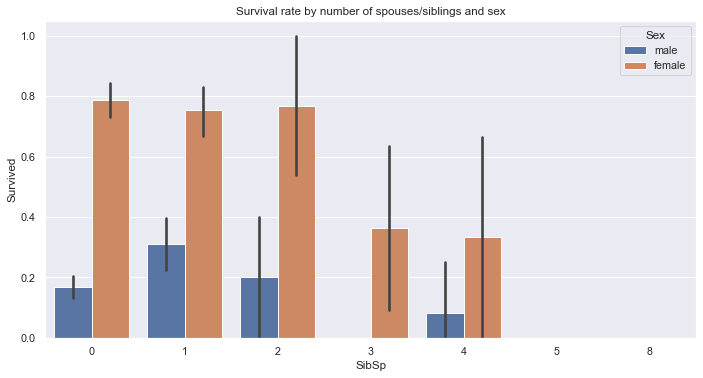

In [232]:
sns.barplot(data=titanic, x='SibSp', y='Survived',hue='Sex')
plt.title('Survival rate by number of spouses/siblings and sex');

Women had much higher rates of survival in all SibSp categories.

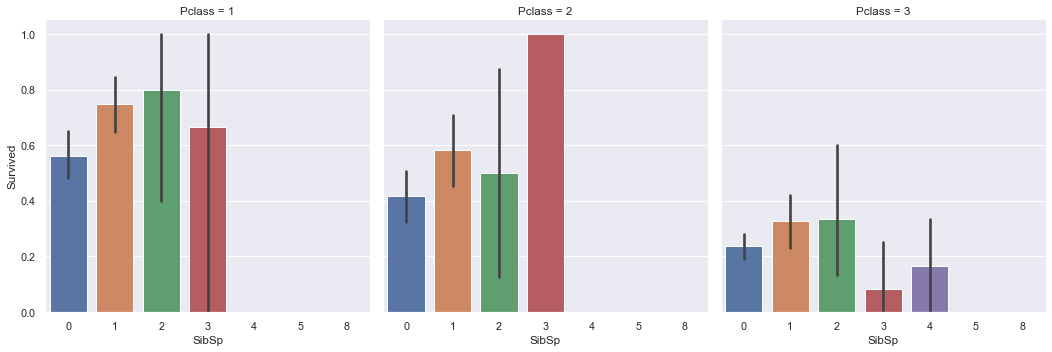

In [237]:
sns.catplot(data=titanic, x='SibSp', y='Survived',kind='bar', col='Pclass');

Survival rates for 1st class were much higher than 3rd class, regardless of SibSp.
All travelers in 2nd class with 3 spouses/sibling survived.
Nobody traveling with more than 4 spouses/siblings survived.

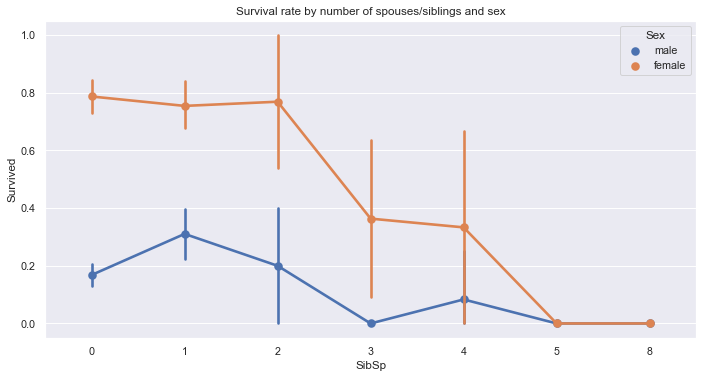

In [241]:
sns.pointplot(data=titanic, x='SibSp', y='Survived', hue='Sex')
plt.title('Survival rate by number of spouses/siblings and sex');

Survival rates for females was especially high if traveling with 0-2 SibSp

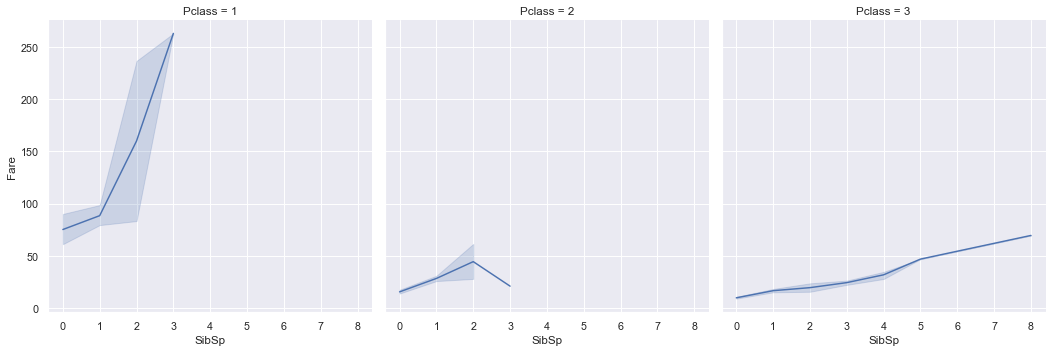

In [265]:
sns.relplot(data=titanic, x='SibSp', y='Fare', col='Pclass', kind='line');

In [ ]:
Number of spouses increased price of individual fares

Observations:
- Most people traveled without a spouse/sibling
- On average traveling with 1 spouse/sibling increased chances of survival, this is especially true for men, but not for women
- Women were much more likely to survive than men, regardless of siblings.
- Nobody traveling with more than 4 spouses/siblings survived

7. Parch - numbers of parents/children aboard the Titanic

In [259]:
titanic['Parch'].value_counts().sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

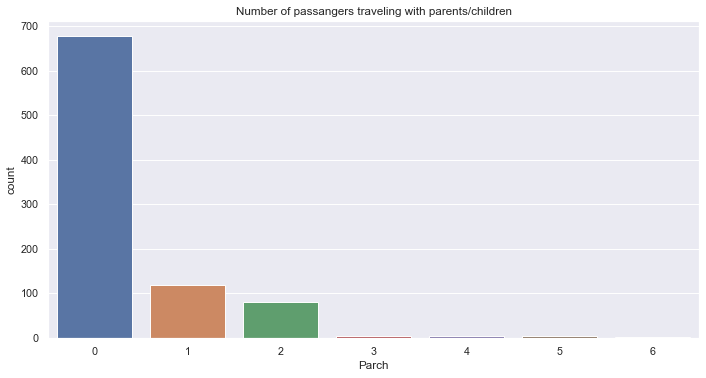

In [266]:
sns.countplot(data=titanic, x='Parch')
plt.title('Number of passangers traveling with parents/children');

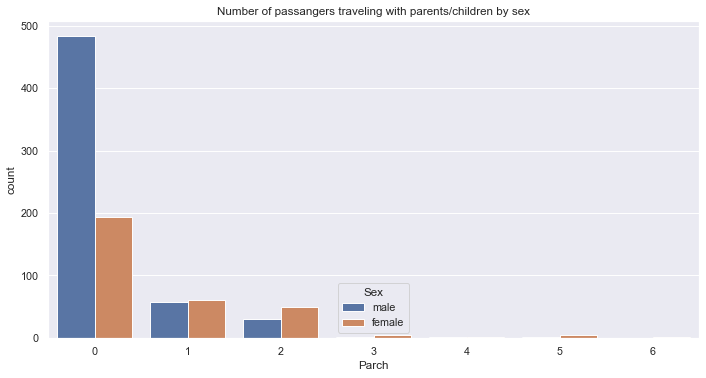

In [267]:
sns.countplot(data=titanic, x='Parch', hue='Sex')
plt.title('Number of passangers traveling with parents/children by sex');

Most people traveled without parents/children - especially men.

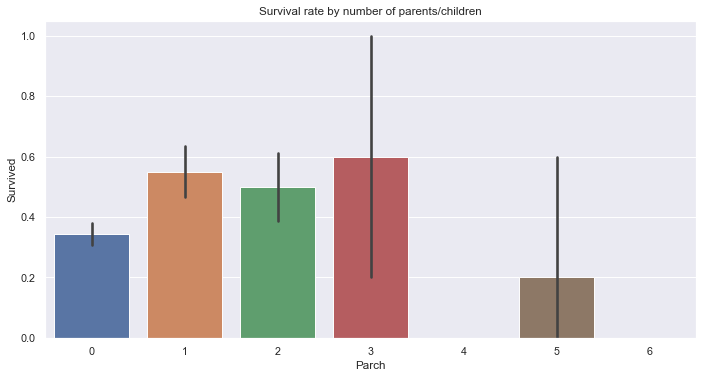

In [268]:
sns.barplot(data=titanic, x='Parch', y='Survived')
plt.title('Survival rate by number of parents/children');

Survival rates for those traveling with 1 to 3 parents and/or children was relatively high.

In [314]:
titanic[(titanic['Parch']>=1) & (titanic['Parch']<=3)]['Survived'].mean()

0.5320197044334976

On average 53% of those traveling with 1 to 3 Parch survived

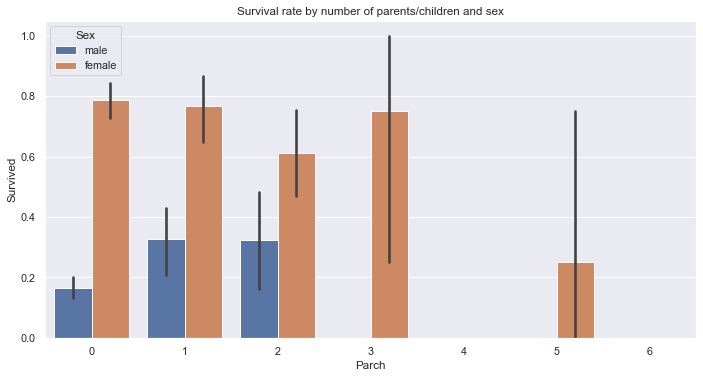

In [325]:
sns.barplot(data=titanic, x='Parch', y='Survived', hue='Sex')
plt.title('Survival rate by number of parents/children and sex');

In [316]:
titanic[((titanic['Parch']>=0) & (titanic['Parch']<=3))&(titanic['Sex']=='female')]['Survived'].mean()

0.755700325732899

Observations:
- Most people traveled without parents/children - especially men.
- Survival rates of passengers with Parch 1-3 was around 53%
- Survival rate for women traveling with up to 3 parents and/or children was more than 75%

8. Embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [317]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

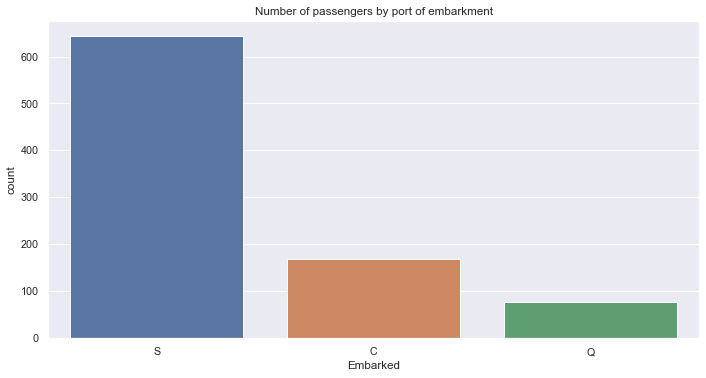

In [326]:
sns.countplot(data=titanic, x='Embarked')
plt.title('Number of passengers by port of embarkment');

Most people embarked from Southampton.

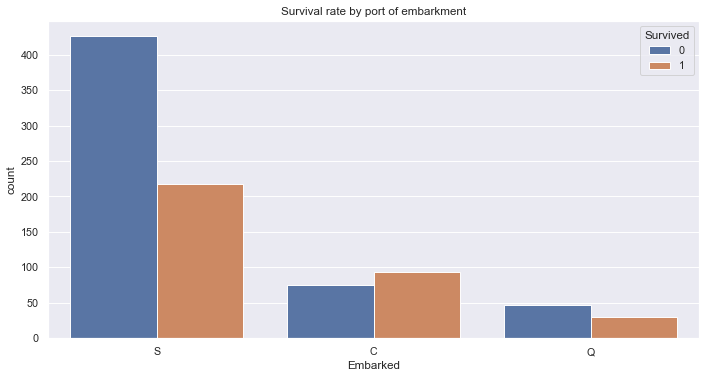

In [327]:
sns.countplot(data=titanic, x='Embarked', hue='Survived')
plt.title('Survival rate by port of embarkment');

Around 1/3 travelers from Southampton survived, more than half of those departing from Cherbourgh and less than half from Queenstown survived. Which we can more clearly show here:

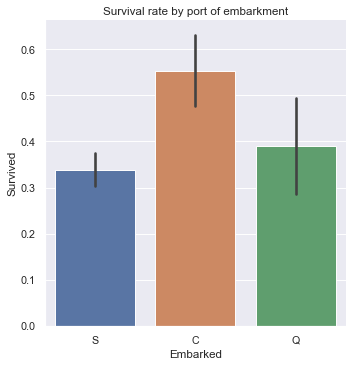

In [328]:
sns.catplot(data=titanic, x='Embarked', y='Survived', kind='bar')
plt.title('Survival rate by port of embarkment');

In [370]:
titanic[titanic['Embarked']=='S']['Survived'].mean()

0.33695652173913043

Observations:
- Most passengers embarked the Titanic at Southampton
- Survival rates were greatest for those embarking at Cherbourh and lowest in Southampton

9. Person - adding a children category

In [341]:
titanic['Person'] = titanic['Sex']
titanic.loc[titanic['Age'] < 18, 'Person'] = 'child'

In [343]:
titanic['Person'].value_counts()

male      519
female    259
child     113
Name: Person, dtype: int64

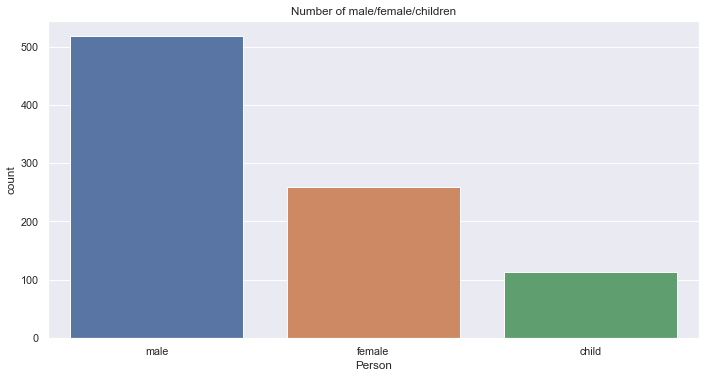

In [346]:
sns.countplot(data=titanic, x='Person')
plt.title('Number of male/female/children');

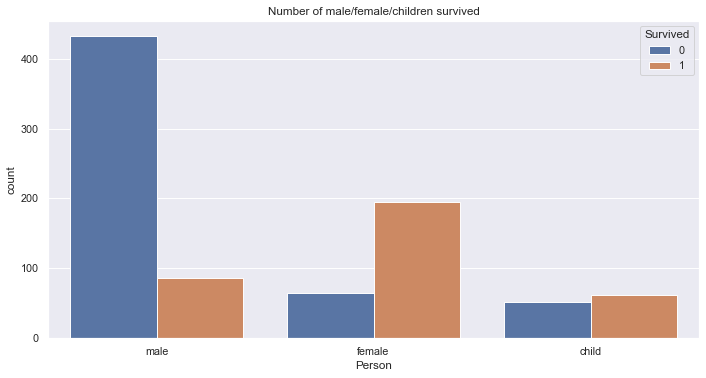

In [347]:
sns.countplot(data=titanic, x='Person', hue='Survived')
plt.title('Number of male/female/children survived');

Children and women have a survival rate over 50%, men have a terribly low survival rate.

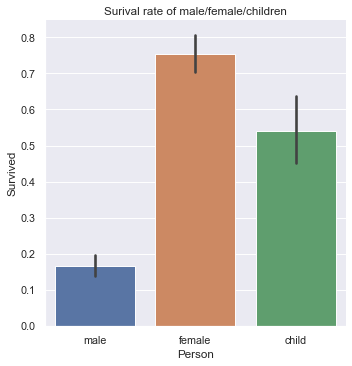

In [348]:
sns.catplot(data=titanic, x='Person', y='Survived', kind='bar')
plt.title('Surival rate of male/female/children');

Survival rate men around 18%, women 75% and children 54%

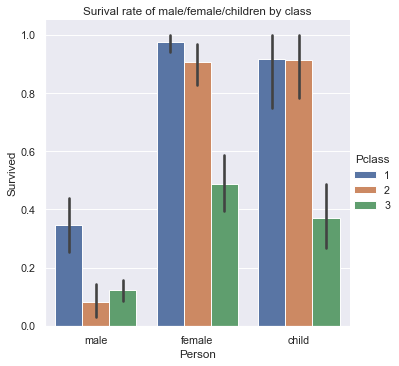

In [349]:
sns.catplot(data=titanic, x='Person', y='Survived', kind='bar', hue='Pclass')
plt.title('Surival rate of male/female/children by class');

Women and children in the 1st class were extremely likely to survive.

In [356]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [364]:
titanic[((titanic['Person']=='female')&(titanic['Pclass']!=3))]['Survived'].mean()

0.9466666666666667

In [365]:
titanic[((titanic['Person']=='child')&(titanic['Pclass']!=3))]['Survived'].mean()

0.9142857142857143

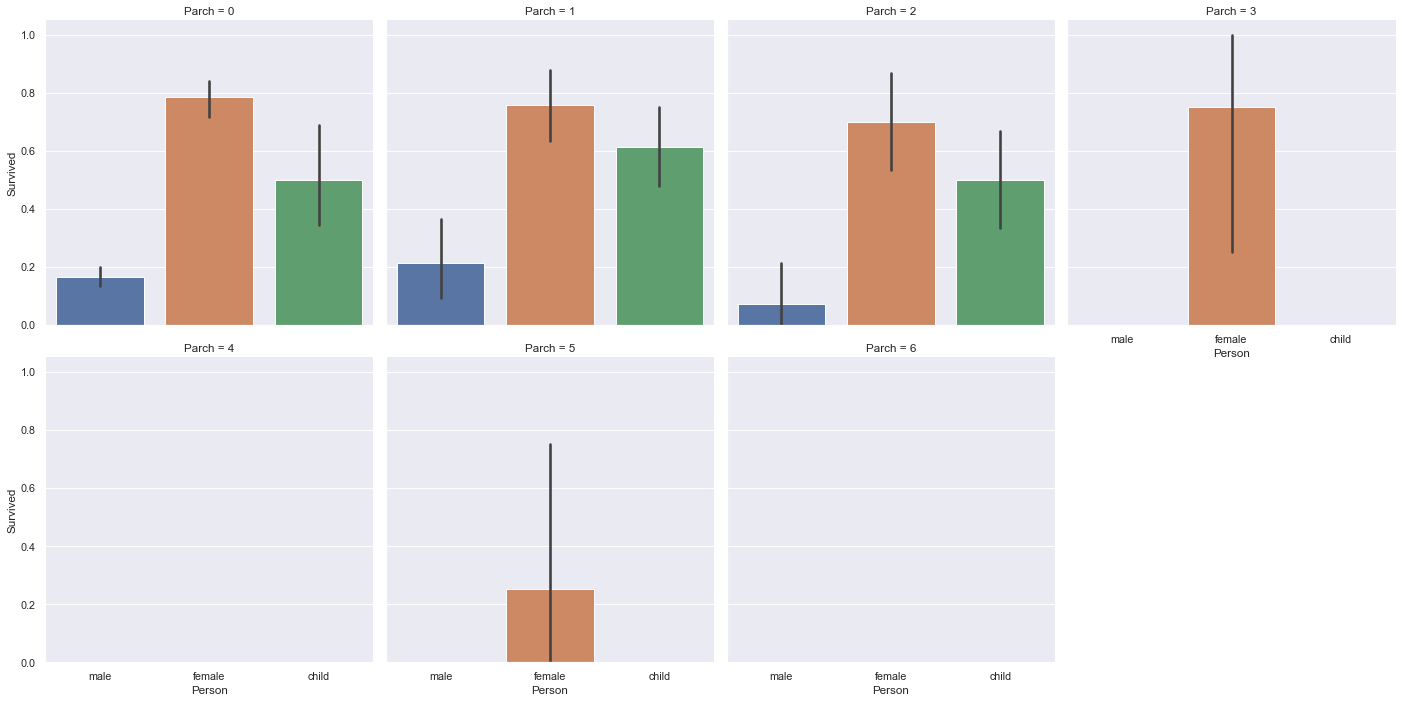

In [352]:
sns.catplot(data=titanic, x='Person', y='Survived', kind='bar', col='Parch', col_wrap=4);

Observations:
- Survival rates for men low across the spectrum
- Women and children had high survival rates, especially in 1st and 2nd class

10. Summary and Conclusions

After studying this Titanic dataset we got to know a lot about its passengers, and we can make some assumptions on the chances of survival.

- Total passengers number 891, of which 549 (61,6%) perished and 342 (38,4%) survived
- Most passengers were traveling in 3rd class (709) and this class has the lowest survival rate
- The median age of all passengers was 28, the oldest passenger survived
- Higher fare means greater chances of survival, which is closely linked to class
- Size of family impacts chances of survival, with families of 2 to 4 people having the greatest chance to survive. As family size increases past 4, survival rate drops.
- Women and children in 1st and 2nd class were very likely to survive (women: 94,7%, children: 91,4%)
- Most passangers embarked from Southampton (644), which had also the lowest percentage of survivors (33,7%)

Answering our question: what sorts of people were more likely to survive?

Treating all parameters seperately, the most likely survivor is:
- a young female passenger, that;
- embarked from Cherbourg;
- paid a large amount for her fare and traveled 1st class, with;
- a moderate sized family

The overall odds for survival is influenced greatly by the relationship between variables, which was not explored in this analysis - a topic for a future project.